In [1]:
import os
%set_env CUDA_PATH=e:\cuda\bin
%set_env CUDA_PATH_V11_2=e:\cuda\bin
%set_env PATH=%PATH%;e:\cuda\bin;e:\cuda\extras;e:\cuda\include;e:\cuda\lib
!set
os.add_dll_directory(r'e:\cuda\bin')
import cv2
import glob
from os.path import relpath
from os.path import basename
from os.path import dirname
from os.path import join
from os.path import splitext
import json

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

env: CUDA_PATH=e:\cuda\bin
env: CUDA_PATH_V11_2=e:\cuda\bin
env: PATH=%PATH%;e:\cuda\bin;e:\cuda\extras;e:\cuda\include;e:\cuda\lib
ALLUSERSPROFILE=C:\ProgramData
APPDATA=C:\Users\Tasha\AppData\Roaming
CHOCOLATEYINSTALL=C:\ProgramData\chocolatey
CHOCOLATEYLASTPATHUPDATE=132749319048680296
CLICOLOR=1
COMMONPROGRAMFILES=C:\Program Files\Common Files
COMMONPROGRAMFILES(X86)=C:\Program Files (x86)\Common Files
COMMONPROGRAMW6432=C:\Program Files\Common Files
COMPUTERNAME=DESKTOP-Q43PAG5
COMSPEC=C:\WINDOWS\system32\cmd.exe
CUDA_PATH=e:\cuda\bin
CUDA_PATH_V11_2=e:\cuda\bin
DOKANLIBRARY1=C:\Program Files\Dokan\Dokan Library-1.5.0\
DOKANLIBRARY1_LIBRARYPATH_X64=C:\Program Files\Dokan\Dokan Library-1.5.0\lib\
DOKANLIBRARY1_LIBRARYPATH_X86=C:\Program Files\Dokan\Dokan Library-1.5.0\x86\lib\
DRIVERDATA=C:\Windows\System32\Drivers\DriverData
FPS_BROWSER_APP_PROFILE_STRING=Internet Explorer
FPS_BROWSER_USER_PROFILE_STRING=Default
GIT_PAGER=cat
GPU_FORCE_64BIT_PTR=0
GPU_MAX_ALLOC_PERCENT=95
GPU_MAX_

In [2]:
#data_dir = relpath("""E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data""",__file__)
data_dir ="""E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data\*\*"""

examples = glob.glob(data_dir)
print(examples[0],len(examples))

E:\lambda\labs\ds-test-2\models\synthetic_data\synthetic_data_for_pipeline_transform\data\10\0024f82d-f8be-4f7a-a089-d5061a9e22d9.json 121800


In [3]:
records = {join(dirname(fn),basename(fn).split(".")[0]) for fn in examples}
X_train =[ cv2.cvtColor(cv2.imread(x),cv2.COLOR_RGB2BGR) for x in examples if "X_input" in x ]
#y_train =[ y for y in examples if "y_label" in y ]
y_train =[ json.loads( open(y,'rb').read() )["y_label_points"] for y in examples if ".json" in y ]

In [4]:
len(X_train)

40600

In [5]:
#X_train

In [6]:
#y_train

In [7]:
img_inputs = keras.Input(shape=(256, 256-64, 3))
x=img_inputs
#x= layers.Dropout(.2)(x)
#x = layers.Conv2D(32,3,2)(x)
#x = layers.BatchNormalization()(x)
#x = layers.Activation("relu")(x)
#x = layers.MaxPool2D((3,3))(x)

#x = layers.Conv2D(16,3,2)(x)
#x = layers.BatchNormalization()(x)
#x = layers.Activation("relu")(x)
#x = layers.MaxPool2D((3,3))(x)

x = layers.Flatten()(x)

x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(24, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(8,)(x)
model = keras.Model(inputs=img_inputs, outputs=outputs, name="FC_Model")
model.summary()

Model: "FC_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 192, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 32)                4718624   
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 24)                792

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape((X_train.shape[0],8))
print(y_train.shape,X_train.shape)
model.compile(loss="MAE",optimizer=tf.keras.optimizers.Adam(learning_rate=.0001))
#model.fit(X_train,y_train)

(40600, 8) (40600, 256, 192, 3)


In [15]:
with tf.device("GPU"):
    history = model.fit(X_train,y_train,epochs=20,validation_split=.2,shuffle=True,batch_size=1000)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [9]:
history2 = model.fit(X_train,y_train,epochs=200,validation_split=.2)

Epoch 1/200
1015/1015 [==============================] - 15s 11ms/step - loss: 16.2609 - val_loss: 42.9190 - ETA: 8s - loss: 97.9889 

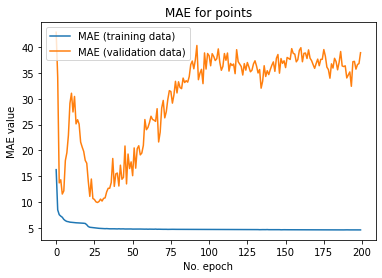

In [11]:
history=history2
# plot history
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for points')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [11]:
# load real data

path_real = r'E:\lambda\labs\ds-test-2\data\transcribed_stories\*\*\phase0\*'
real_set=glob.glob(path_real)

X_real =np.array([ cv2.cvtColor(cv2.imread(x),cv2.COLOR_RGB2BGR) for x in real_set if "X_input" in x ])
y_real =[ json.loads(open(y,'rb').read() )["y_label_points"] for y in real_set if ".json" in y ]
print(y_real)
y_real = np.array(y_real).reshape((X_real.shape[0],8))
print(X_real.shape,y_real.shape)
#print(X_real,y_real)

[[[28.4377358490566, 20.545454545454547], [190.5509433962264, 18.363636363636363], [187.4716981132075, 206.0], [27.169811320754715, 199.27272727272725]], [[28.256603773584903, 24.727272727272727], [190.00754716981132, 23.09090909090909], [190.5509433962264, 249.27272727272725], [25.72075471698113, 245.09090909090907]]]
(2, 256, 192, 3) (2, 8)


In [ ]:
model.trainable=True
model.fit(X_real,y_real,epochs=1000)

In [14]:
with tf.device("GPU"):
    for _ in range(100):
        model.fit(X_real,y_real,epochs=10)
        model.fit(X_train,y_train,epochs=5,validation_split=.2)

Epoch 1/10
1/1 [==============================] - 0s 8ms/step - loss: 6.0912
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9593
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 6.4244
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 6.8619
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 6.8942
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 6.3555
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 6.3569
Epoch 8/10
1/1 [==============================] - 0s 7ms/step 

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
!set